In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

In [2]:
dt = 0.25 #in fs

with open("velocities.trj", "r") as f:
    traj = f.read()

timesteps = traj.split("ITEM: TIMESTEP")[1:]

natoms = int(timesteps[1].split("\n")[3])

finalstep = int(timesteps[-1].split('\n')[1])
n_steps = finalstep+1
steps = np.arange(0, n_steps, 1)
t = (steps*dt)/1000000 #in ns
T = n_steps*dt

vtraj = [[] for iatom in range(natoms)]

for timestep in timesteps:
    velocities = timestep.split("ITEM: ATOMS id mass vx vy vz")[1]
    velocities = np.loadtxt(velocities.split("\n"), usecols=(2,3,4))
    for iatom in range(natoms):
        vtraj[iatom].append(velocities[iatom])
        
vtraj = np.array(vtraj)

In [3]:
norm = []
for i in range(n_steps):
    norm.append(np.linalg.norm(vtraj[0, i]))

In [ ]:
plt.plot(steps, norm)

In [ ]:
norm2 = np.array(norm)

norm2 = (norm2-norm2.mean())/np.std(norm2)
#norm2 =(norm2-norm2.min())/(norm2.max()-norm2.min())

autocorr = signal.fftconvolve(norm2, norm2[::-1], mode='full')

fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(norm2)
ax_orig.set_title('White noise')

ax_mag.plot(np.arange(-len(norm2)+1,len(norm2)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()

In [17]:
norm3 = []
for i in range(n_steps):
    norm3.append(np.linalg.norm(vtraj[1, i]))

In [ ]:
plt.plot(steps, norm)
plt.plot(steps,norm3)

In [ ]:
norm2 = np.array(norm)

norm2 = (norm2-norm2.mean())/np.std(norm2)
#norm2 =(norm2-norm2.min())/(norm2.max()-norm2.min())

autocorr = signal.fftconvolve(norm2, norm2[::-1], mode='full')

fig, (ax_orig, ax_mag) = plt.subplots(2, 1)

ax_orig.plot(np.arange(-len(norm2)+1,len(norm2)), autocorr)
ax_orig.set_title('Autocorrelation')
fig.tight_layout()

norm3= np.array(norm3)

norm4 = (norm3-norm3.mean())/np.std(norm3)
#norm2 =(norm2-norm2.min())/(norm2.max()-norm2.min())

autocorr2 = signal.fftconvolve(norm4, norm4[::-1], mode='full')


ax_mag.plot(np.arange(-len(norm4)+1,len(norm4)), autocorr2)

ax_mag.set_title('Autocorrelation')
fig.tight_layout()

In [ ]:
plt.plot(np.arange(-len(norm4)+1,len(norm4)), autocorr)
plt.plot(np.arange(-len(norm4)+1,len(norm4)), autocorr2)

1cm−1=29.9792458 ns−1

1 fs = 33356.40952 cm-1

In [ ]:
def acf(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

In [ ]:
a = acf(norm2)

In [ ]:
plt.plot(steps, a)
plt.xlim(0,2000)

In [ ]:
b = np.fft.fft(a)

In [ ]:
c = np.real(b)

In [ ]:
plt.plot(steps,c)

In [4]:
def autocorrelation (x) :
    """
    Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal.
    """
    xp = x-np.mean(x) # subtract the mean from the signal and obtain an unbiased signal
    f = np.fft.fft(xp) # compute the Fourier transform of the unbiased signal
    p = np.array([np.real(v)**2+np.imag(v)**2 for v in f]) #compute the power spectral density of the signal, 
    #by taking the square norm of each value of the Fourier transform of the unbiased signal
    pi = np.fft.ifft(p) # compute the inverse Fourier transform of the power spectral density
    return np.real(pi)[:x.size/2]/np.sum(xp**2) #normalize the inverse Fourier transform of the power spectral 
#density by the sum of the squares of the unbiased signal, and take only half of the resulting vector

In [10]:
norm_np = np.array(norm)
norm_np

array([ 0.00421293,  0.00416054,  0.00428113, ...,  0.0062107 ,
        0.00643717,  0.00641072])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


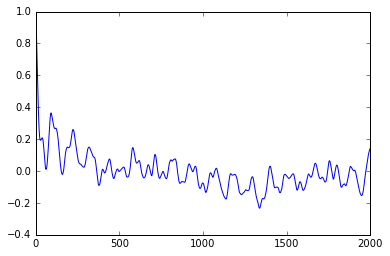

In [12]:
a = autocorrelation(norm_np)
plt.plot(steps[:2000], a)

In [13]:
def psd (x) :
    """
    Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal.
    """
    xp = x-np.mean(x) # subtract the mean from the signal and obtain an unbiased signal
    f = np.fft.fft(xp) # compute the Fourier transform of the unbiased signal
    p = np.array([np.real(v)**2+np.imag(v)**2 for v in f]) #compute the power spectral density of the signal, 
    # by taking the square norm of each value of the Fourier transform of the unbiased signal
    return p #normalize the inverse Fourier transform of the power spectral 
#density by the sum of the squares of the unbiased signal, and take only half of the resulting vector

(0, 200)

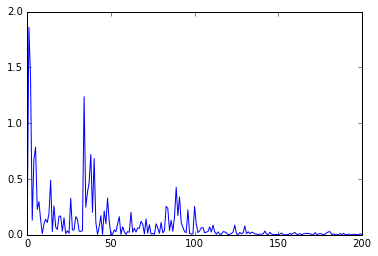

In [22]:
b = psd(norm_np)
plt.plot(steps, b)
plt.xlim(0,200)

(0, 300)

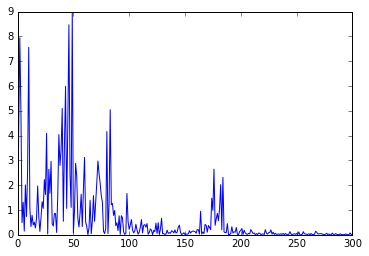

In [21]:
norm3_np = np.array(norm3)
c = psd(norm3_np)
plt.plot(steps, c)
plt.xlim(0,300)

(0, 300)

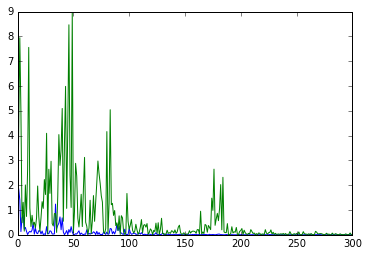

In [25]:
plt.plot(steps, b)
plt.plot(steps, c)
plt.xlim(0,300)

In [26]:
dt = 0.25 #in fs

with open("velocities.trj2", "r") as f:
    traj2 = f.read()

timesteps = traj2.split("ITEM: TIMESTEP")[1:]

natoms = int(timesteps[1].split("\n")[3])

finalstep = int(timesteps[-1].split('\n')[1])
n_steps = finalstep+1
steps = np.arange(0, n_steps, 1)
t = (steps*dt)/1000000 #in ns
T = n_steps*dt

vtraj = [[] for iatom in range(natoms)]

for timestep in timesteps:
    velocities = timestep.split("ITEM: ATOMS id mass vx vy vz")[1]
    velocities = np.loadtxt(velocities.split("\n"), usecols=(2,3,4))
    for iatom in range(natoms):
        vtraj[iatom].append(velocities[iatom])
        
vtraj = np.array(vtraj)

In [27]:
normm = []
for i in range(n_steps):
    normm.append(np.linalg.norm(vtraj[0, i]))

In [28]:
normm_np = np.array(normm)

In [37]:
print (len(d))
print (len(np.arange(0, 4000000, 1)))

4000001
4000000


In [34]:
len(b)

4001

(0, 200)

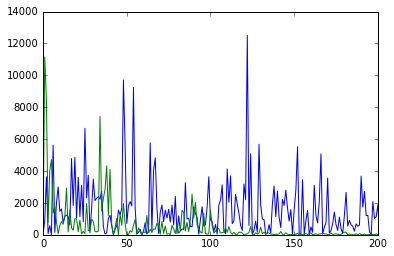

In [40]:
d = psd(normm_np)
plt.plot(np.arange(0, 4000001, 1), d)
plt.plot(np.arange(0, 4001, 1), 6000*b)
plt.xlim(0,200)